In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pred_full = pd.read_csv("predicted_probs_2024.csv")
pred_winners = pd.read_csv("predicted_winners_2024.csv")
real = pd.read_csv("f1_2024_winners.csv")


In [21]:
top3_lookup = (
    pred_full
    .sort_values(["race", "win_prob"], ascending=[True, False])
    .groupby("race")
    .head(3)
    .groupby("race")["driver"]
    .apply(list)
    .reset_index(name="top3_predicted")
)



In [22]:
eval_df = (
    pred_winners
    .merge(real, on="race", how="inner")
    .merge(top3_lookup, on="race", how="left")
)


In [23]:
eval_df["top1_correct"] = (
    eval_df["predicted_winner"] == eval_df["actual_winner"]
)

eval_df["top3_correct"] = eval_df.apply(
    lambda row: row["actual_winner"] in row["top3_predicted"],
    axis=1
)


In [24]:
eval_df[
    [
        "race",
        "predicted_winner",
        "actual_winner",
        "top3_predicted",
        "top1_correct",
        "top3_correct"
    ]
]


,race,predicted_winner,actual_winner,top3_predicted,top1_correct,top3_correct
0,Abu Dhabi Grand Prix,PIA,NOR,"[PIA, NOR, VER]",False,True
1,Australian Grand Prix,VER,SAI,"[VER, NOR, PER]",False,False
2,Azerbaijan Grand Prix,PIA,PIA,"[PIA, PER, ALO]",True,True
3,Bahrain Grand Prix,RUS,VER,"[RUS, HAM, TSU]",False,False
4,Belgian Grand Prix,PIA,HAM,"[PIA, VER, NOR]",False,False
5,British Grand Prix,PIA,HAM,"[PIA, NOR, STR]",False,False
6,Canadian Grand Prix,RUS,VER,"[RUS, ALB, ALO]",False,False
7,Dutch Grand Prix,NOR,NOR,"[NOR, HAM, HUL]",True,True
8,Emilia Romagna Grand Prix,PIA,VER,"[PIA, NOR, HAM]",False,False
9,Hungarian Grand Prix,NOR,PIA,"[NOR, PIA, VER]",False,True


In [5]:
top1 = eval_df["correct"].mean()

top3_hits = 0
for race, g in pred_full.groupby("race"):
    top3 = g.sort_values("win_prob", ascending=False).head(3)["driver"].tolist()
    actual = real.loc[real["race"] == race, "actual_winner"].values[0]
    if actual in top3:
        top3_hits += 1

top3 = top3_hits / pred_full["race"].nunique()

print(f"Top-1 Accuracy (2024): {top1:.3f}")
print(f"Top-3 Accuracy (2024): {top3:.3f}")


Top-1 Accuracy (2024): 0.167
Top-3 Accuracy (2024): 0.556


In [25]:
top3_hits = eval_df["top3_correct"].sum()
total_races = len(eval_df)

print(f"Winner in Top-3: {top3_hits} / {total_races}")
print(f"Top-3 Accuracy: {top3_hits / total_races:.3f}")


Winner in Top-3: 10 / 18
Top-3 Accuracy: 0.556


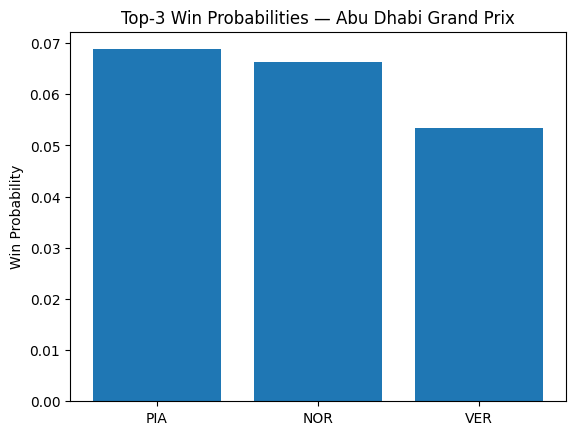

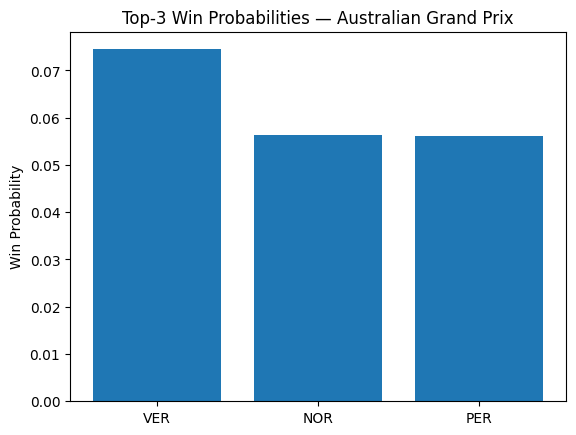

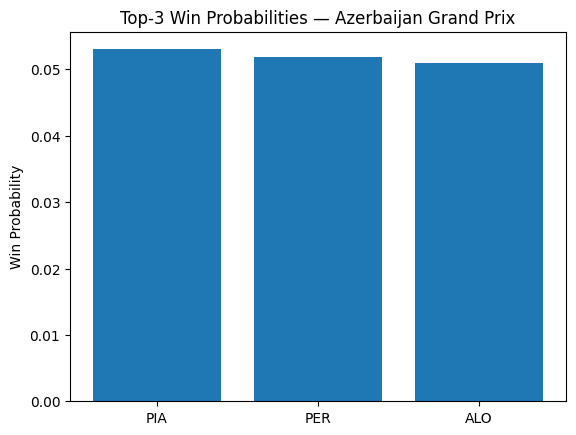

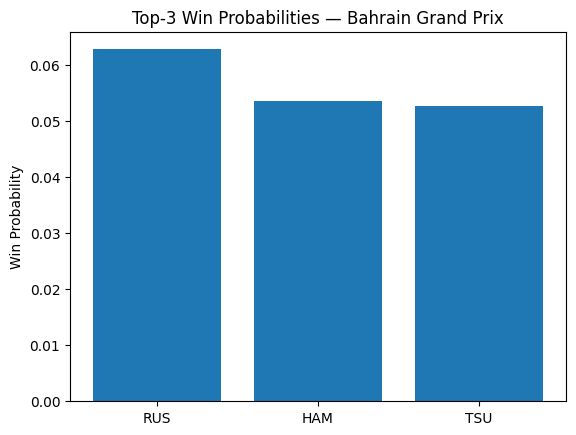

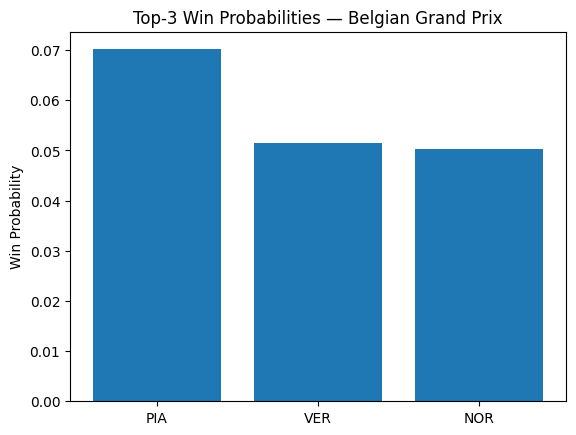

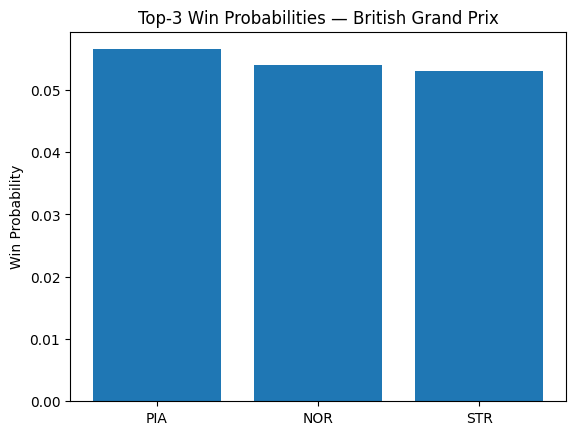

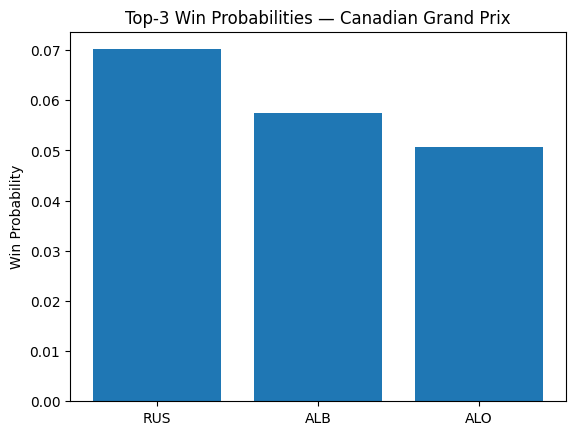

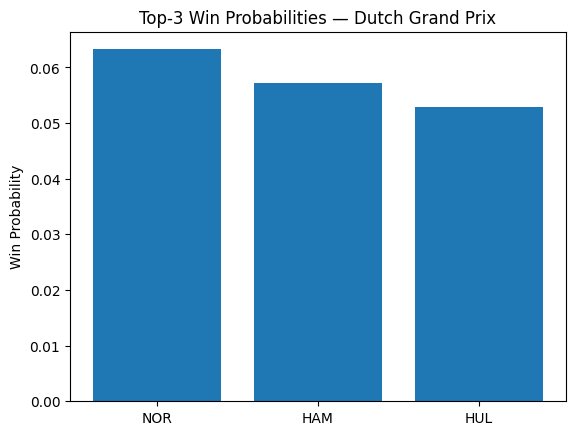

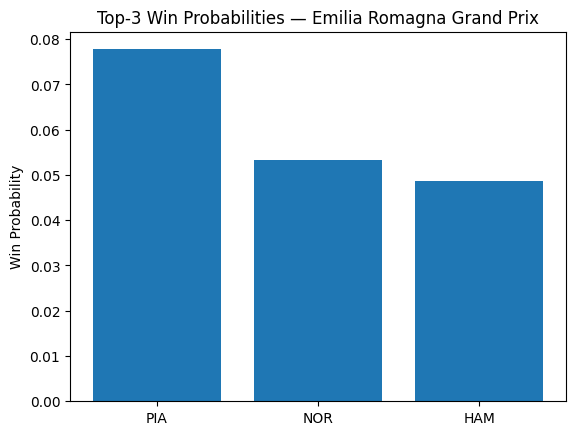

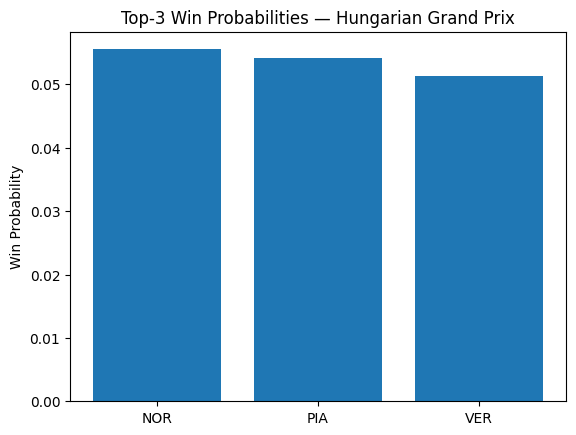

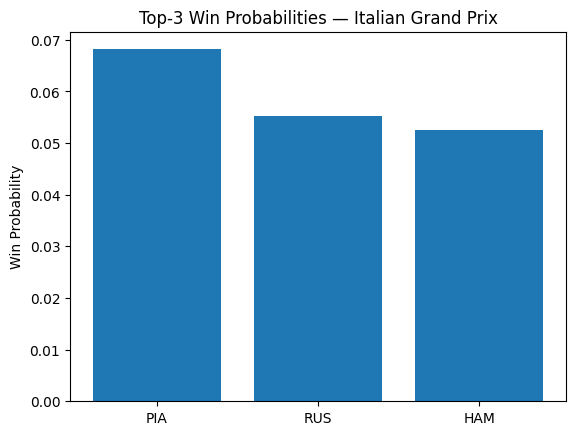

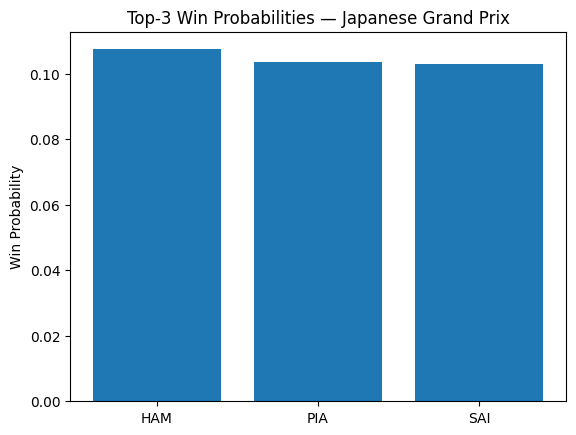

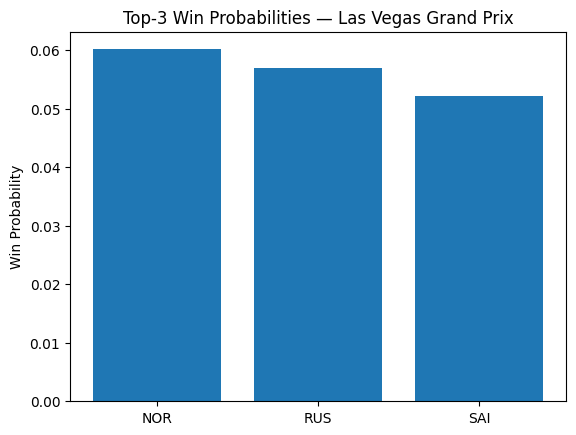

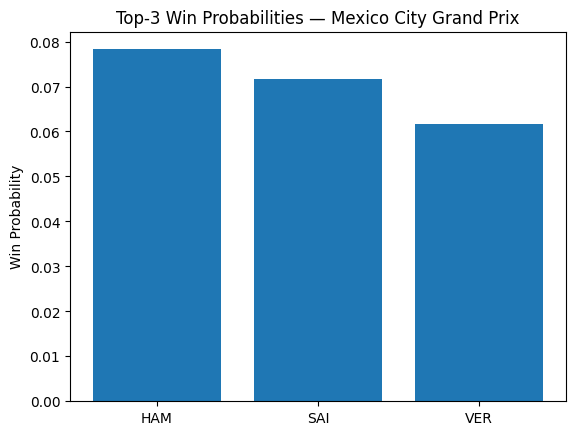

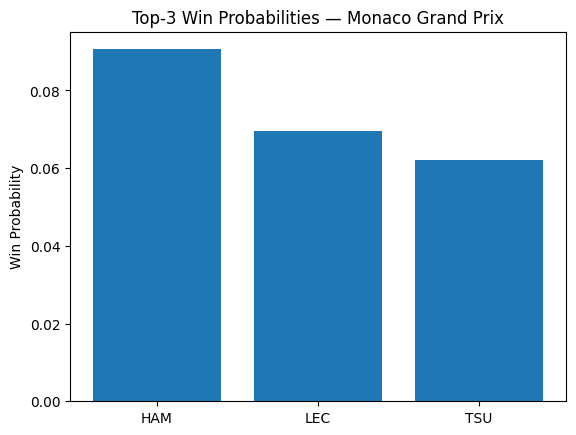

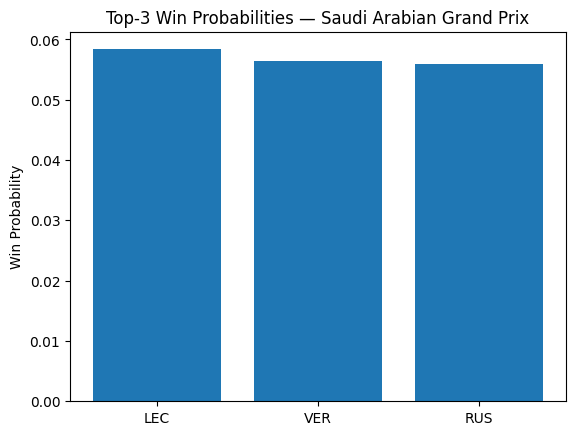

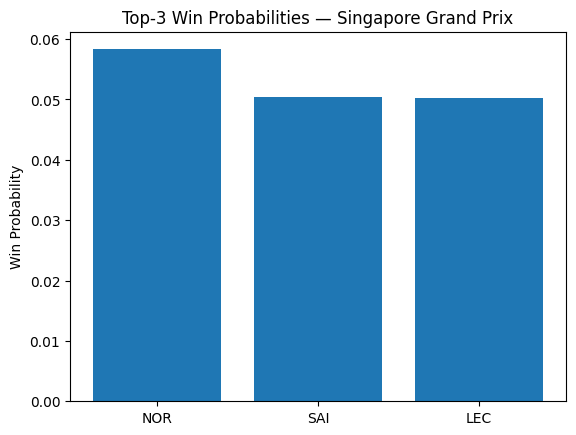

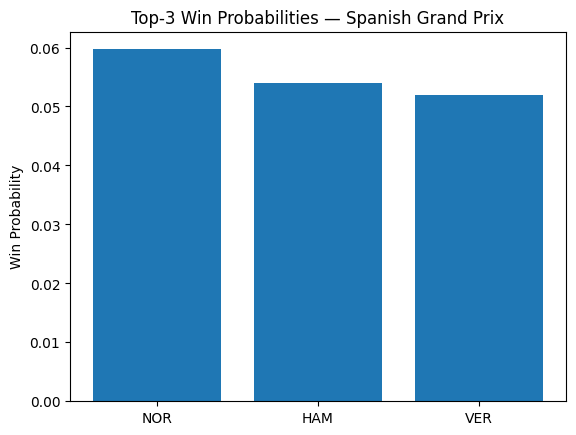

In [7]:
for race, g in pred_full.groupby("race"):
    top3 = g.sort_values("win_prob", ascending=False).head(3)

    plt.figure()
    plt.bar(top3["driver"], top3["win_prob"])
    plt.title(f"Top-3 Win Probabilities — {race}")
    plt.ylabel("Win Probability")
    plt.show()


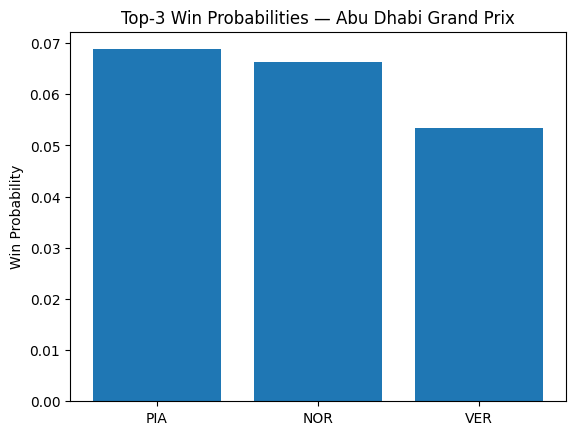

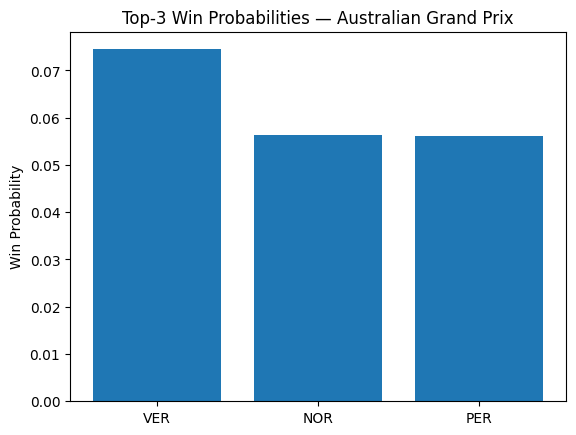

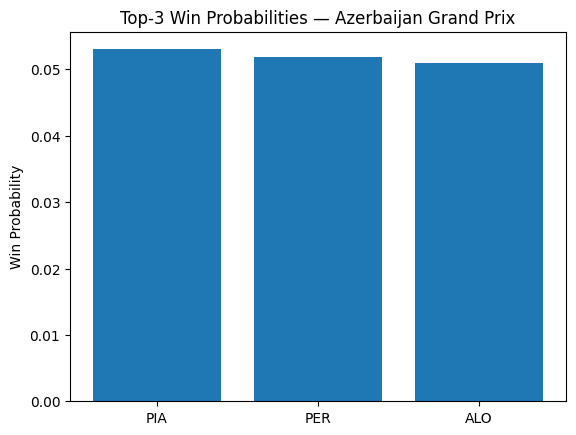

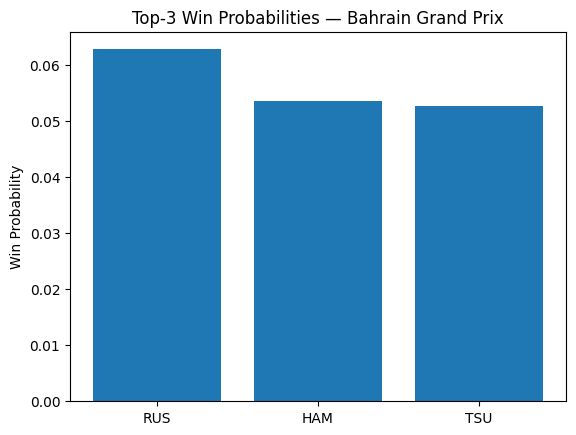

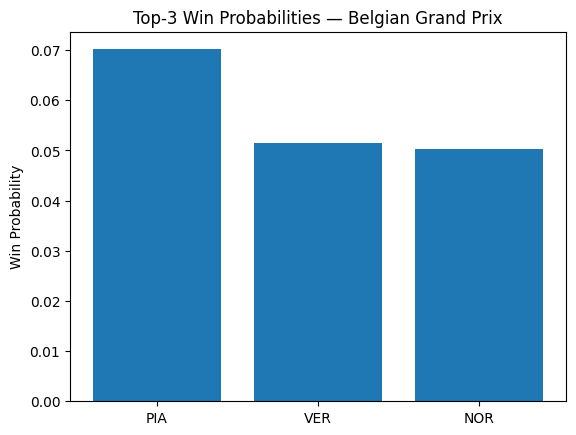

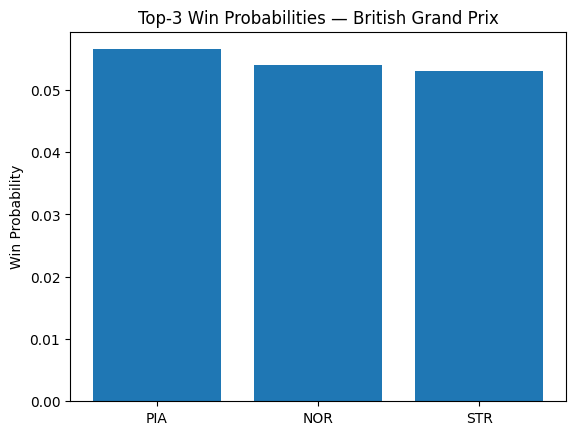

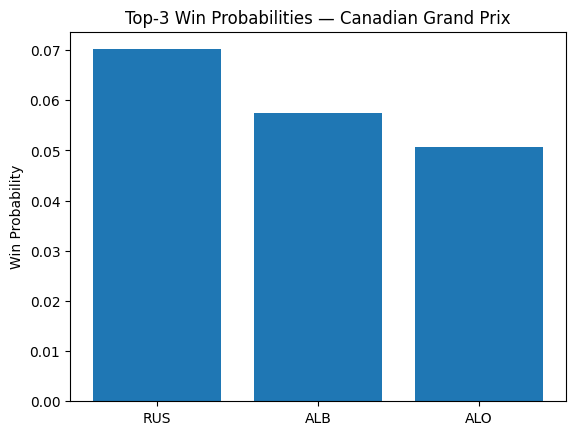

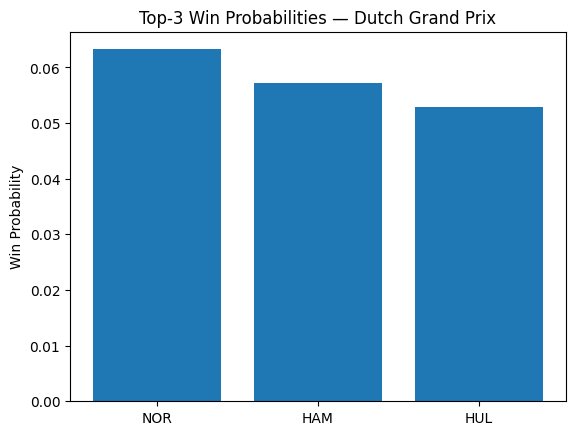

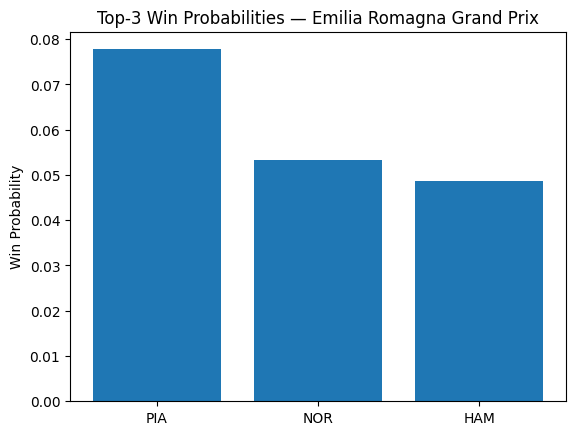

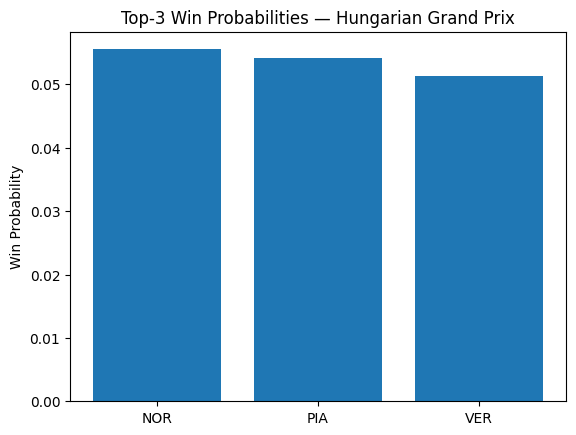

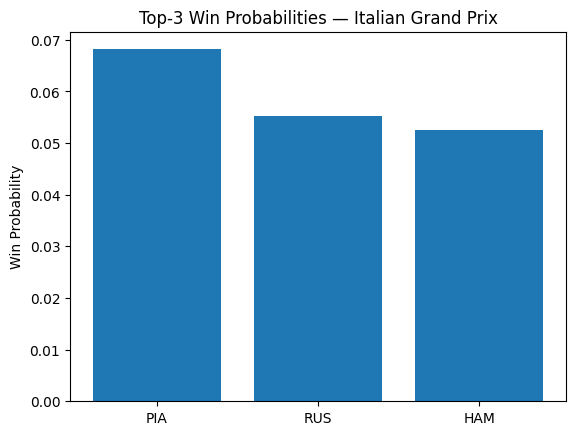

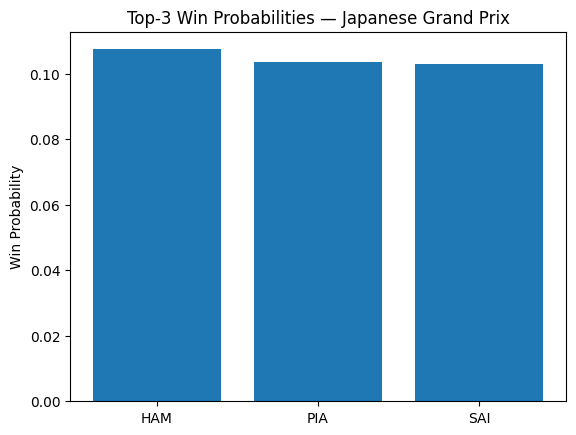

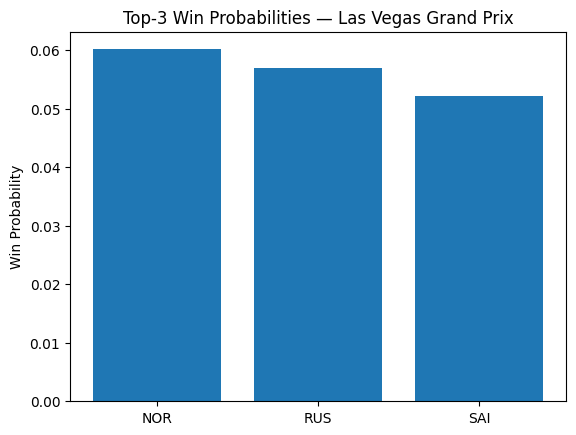

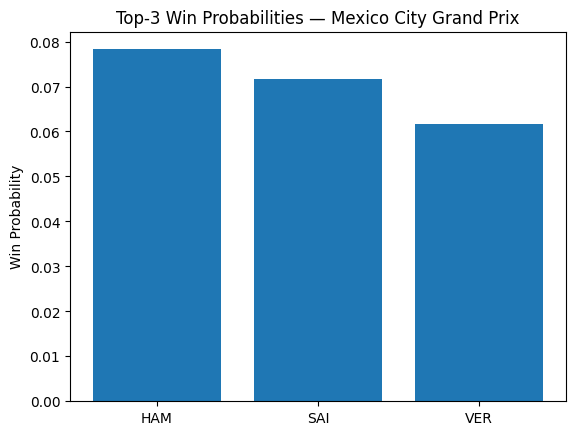

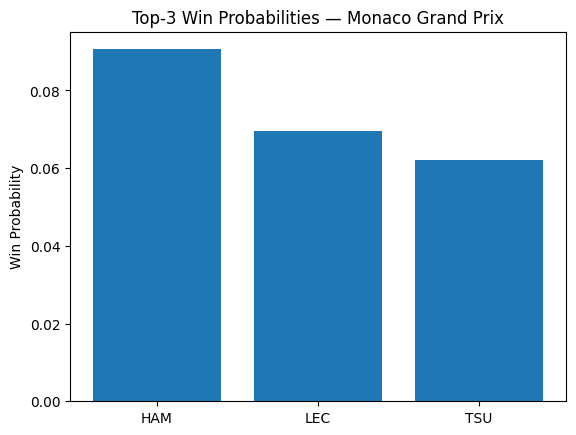

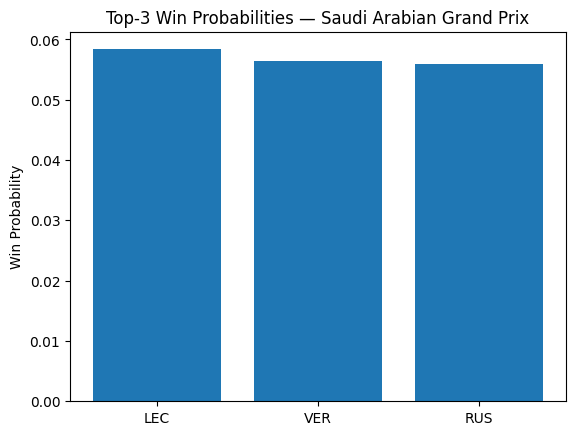

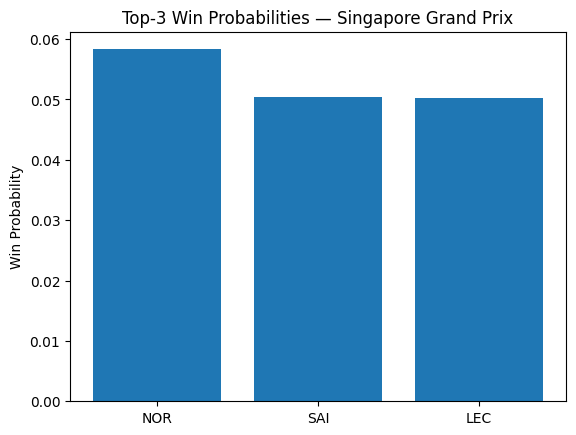

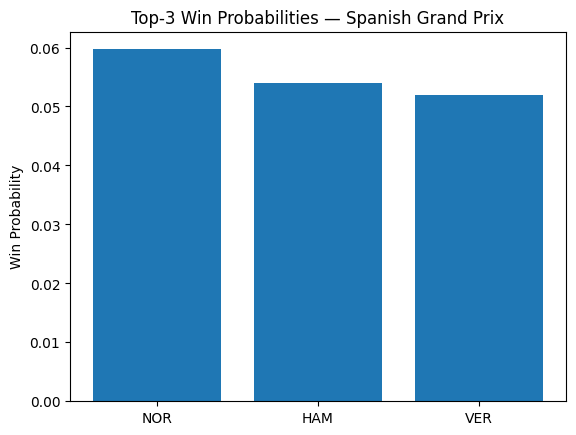

In [8]:
for race, g in pred_full.groupby("race"):
    top3 = g.sort_values("win_prob", ascending=False).head(3)

    plt.figure()
    plt.bar(top3["driver"], top3["win_prob"])
    plt.title(f"Top-3 Win Probabilities — {race}")
    plt.ylabel("Win Probability")
    plt.show()



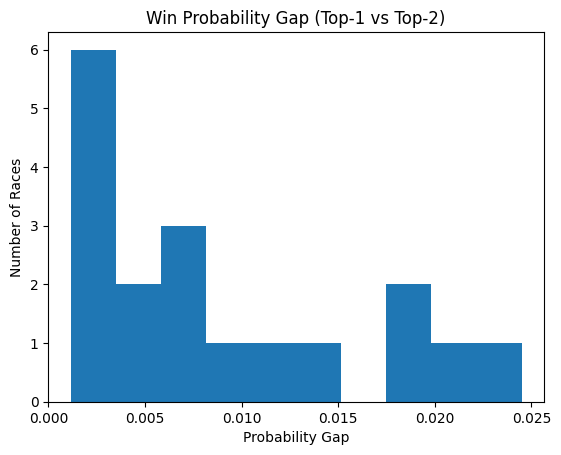

In [9]:
gaps = []

for race, g in pred_full.groupby("race"):
    top2 = g.sort_values("win_prob", ascending=False).head(2)["win_prob"].values
    gaps.append(top2[0] - top2[1])

plt.figure()
plt.hist(gaps, bins=10)
plt.title("Win Probability Gap (Top-1 vs Top-2)")
plt.xlabel("Probability Gap")
plt.ylabel("Number of Races")
plt.show()


In [26]:
top1_hits = eval_df["top1_correct"].sum()
top3_hits = eval_df["top3_correct"].sum()
total = len(eval_df)


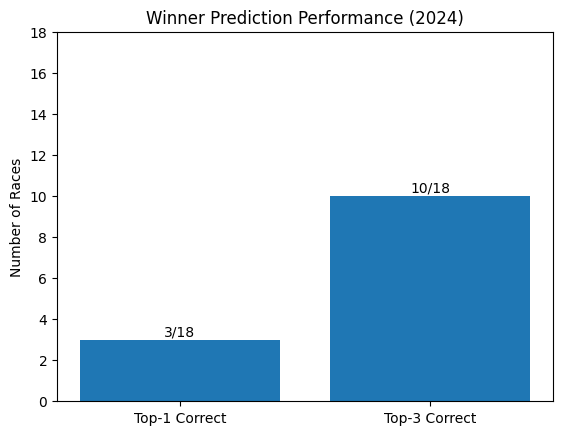

In [27]:
import matplotlib.pyplot as plt

labels = ["Top-1 Correct", "Top-3 Correct"]
values = [top1_hits, top3_hits]

plt.figure()
plt.bar(labels, values)
plt.title("Winner Prediction Performance (2024)")
plt.ylabel("Number of Races")
plt.ylim(0, total)

for i, v in enumerate(values):
    plt.text(i, v + 0.2, f"{v}/{total}", ha="center")

plt.show()


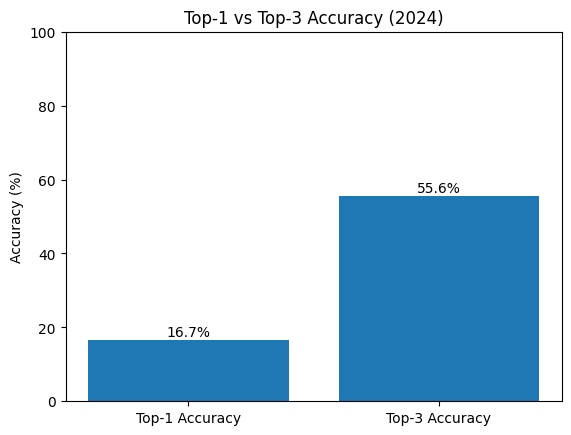

In [28]:
labels = ["Top-1 Accuracy", "Top-3 Accuracy"]
values = [
    top1_hits / total * 100,
    top3_hits / total * 100
]

plt.figure()
plt.bar(labels, values)
plt.title("Top-1 vs Top-3 Accuracy (2024)")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)

for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.1f}%", ha="center")

plt.show()


In [16]:
top3_hits = 0
n_races = 0

for race, g in pred_full.groupby("race"):
    n_races += 1
    top3_drivers = (
        g.sort_values("win_prob", ascending=False)
         .head(3)["driver"]
         .tolist()
    )
    actual = real.loc[real["race"] == race, "actual_winner"].values[0]
    if actual in top3_drivers:
        top3_hits += 1

top3_acc = top3_hits / n_races


In [17]:
top1_acc = float(top1)
top3_acc = float(top3_acc)


In [19]:
summary = pd.DataFrame({
    "Metric": [
        "Top-1 Accuracy (2024)",
        "Top-3 Accuracy (2024)",
        "Random Top-1 (≈)",
        "Random Top-3 (≈)"
    ],
    "Value": [
        round(top1_acc, 3),
        round(top3_acc, 3),
        0.05,
        0.15
    ]
})

summary


,Metric,Value (%)
0,Top-1 Accuracy (2024),16.7
1,Top-3 Accuracy (2024),55.6
2,Random Top-1 (≈),5.0
3,Random Top-3 (≈),15.0


In [20]:
summary_percent = summary.copy()
summary_percent["Value (%)"] = (summary_percent["Value"] * 100).round(1)
summary_percent.drop(columns="Value")


,Metric,Value (%)
0,Top-1 Accuracy (2024),16.7
1,Top-3 Accuracy (2024),55.6
2,Random Top-1 (≈),5.0
3,Random Top-3 (≈),15.0


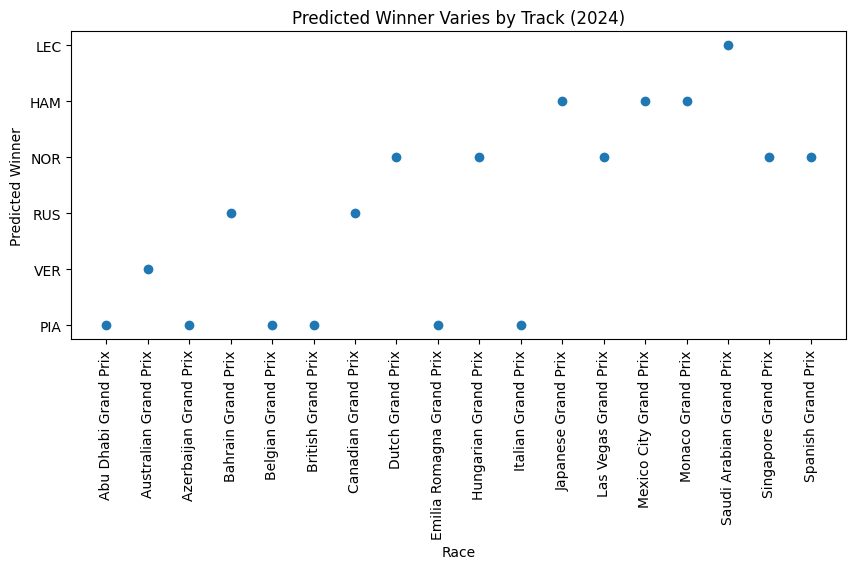

In [29]:
plt.figure(figsize=(10, 4))
plt.scatter(
    pred_winners["race"],
    pred_winners["predicted_winner"]
)
plt.xticks(rotation=90)
plt.title("Predicted Winner Varies by Track (2024)")
plt.xlabel("Race")
plt.ylabel("Predicted Winner")
plt.show()


In [31]:
import pandas as pd
from xgboost import XGBClassifier

FEATURES = [
    "fp2_mean_lap",
    "fp2_std_lap",
    "fp2_best_lap",
    "fp2_laps_count",
    "fp2_deg_slope",
    "best_quali_lap",
    "best_quali_lap_number",
    "dnf"
]

train_df = pd.read_csv("dataset_2022.csv")
X_train = train_df[FEATURES]
y_train = train_df["win"]

model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [32]:
feature_importance = pd.DataFrame({
    "feature": FEATURES,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

feature_importance


,feature,importance
6,best_quali_lap_number,0.192962
4,fp2_deg_slope,0.164364
1,fp2_std_lap,0.150050
3,fp2_laps_count,0.141254
0,fp2_mean_lap,0.119522
5,best_quali_lap,0.118257
2,fp2_best_lap,0.113590
7,dnf,0.000000


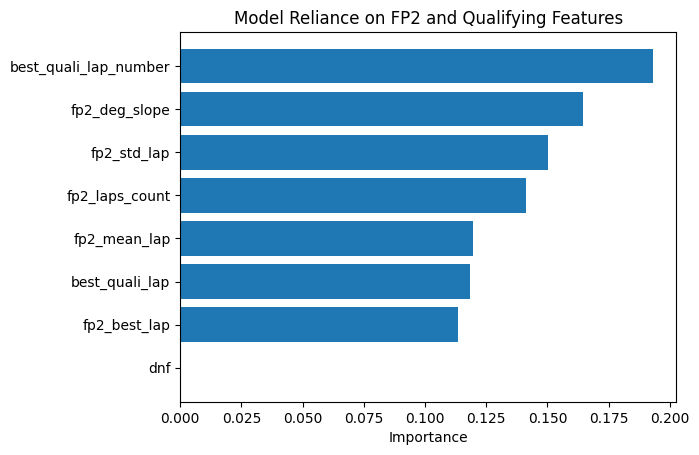

In [33]:
import matplotlib.pyplot as plt

plt.figure()
plt.barh(
    feature_importance["feature"],
    feature_importance["importance"]
)
plt.title("Model Reliance on FP2 and Qualifying Features")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


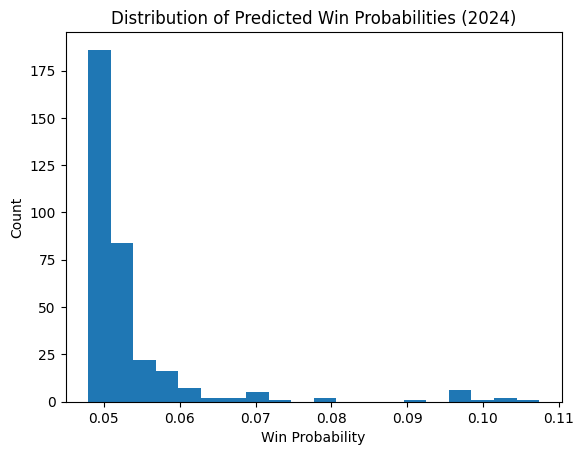

In [34]:
plt.figure()
plt.hist(pred_full["win_prob"], bins=20)
plt.title("Distribution of Predicted Win Probabilities (2024)")
plt.xlabel("Win Probability")
plt.ylabel("Count")
plt.show()


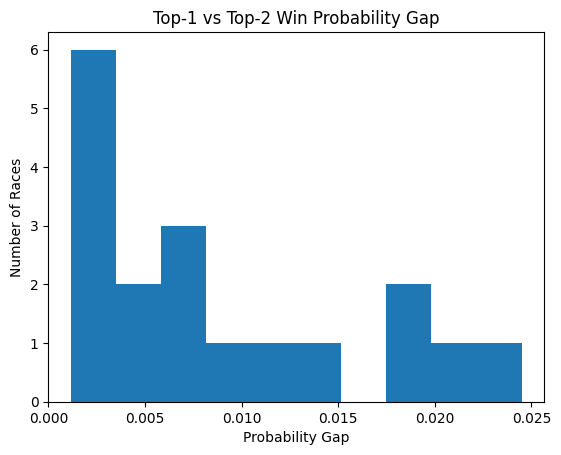

In [35]:
gaps = []

for race, g in pred_full.groupby("race"):
    top2 = g.sort_values("win_prob", ascending=False).head(2)["win_prob"].values
    gaps.append(top2[0] - top2[1])

plt.figure()
plt.hist(gaps, bins=10)
plt.title("Top-1 vs Top-2 Win Probability Gap")
plt.xlabel("Probability Gap")
plt.ylabel("Number of Races")
plt.show()


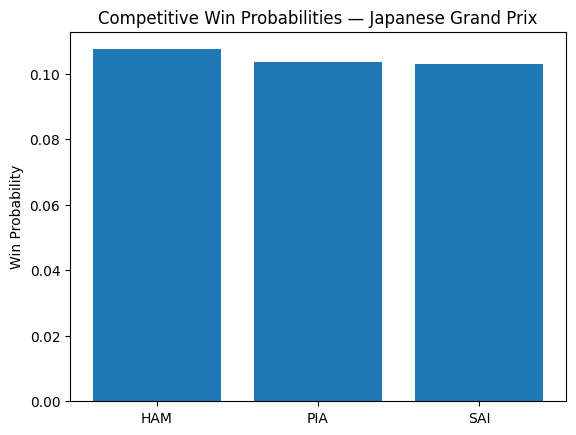

In [36]:
race = "Japanese Grand Prix"
g = pred_full[pred_full["race"] == race].sort_values("win_prob", ascending=False).head(3)

plt.figure()
plt.bar(g["driver"], g["win_prob"])
plt.title(f"Competitive Win Probabilities — {race}")
plt.ylabel("Win Probability")
plt.show()
